## Cars4U Project -  Regression Model To Predict the Price of Used Cars
### To explore and visualize the dataset, build a linear regression model to predict the prices of used cars, and generate a set of insights and recommendations that will help the business.

In [1]:
# import libraries
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

In [2]:
#import my dataset
data_car4u = pd.read_csv('used_cars_data-1.csv')

### Data Observations

In [3]:
data_car4u.sample(10)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
5671,5671,Honda Jazz 1.2 V CVT i VTEC,Coimbatore,2018,20026,Petrol,Automatic,First,19.0 kmpl,1199 CC,88.7 bhp,5.0,9.60,9.27
730,730,BMW 3 Series 320d Luxury Line,Kochi,2015,58390,Diesel,Automatic,First,18.88 kmpl,1995 CC,184 bhp,5.0,54.43,19.86
4269,4269,Maruti Celerio ZXI,Kochi,2018,31396,Petrol,Manual,First,23.1 kmpl,998 CC,67.04 bhp,5.0,5.87,5.53
2758,2758,Maruti Swift VDI Optional,Coimbatore,2018,61386,Diesel,Manual,First,25.2 kmpl,1248 CC,74 bhp,5.0,7.88,7.05
4639,4639,Hyundai EON D Lite Plus,Bangalore,2013,45010,Petrol,Manual,Second,21.1 kmpl,814 CC,55.2 bhp,5.0,10.25,2.95
121,121,Mercedes-Benz B Class B200 CDI,Pune,2014,53753,Diesel,Automatic,Second,15.0 kmpl,2143 CC,107.3 bhp,5.0,37.03,16.75
1689,1689,BMW 5 Series 520d Luxury Line,Kochi,2018,32586,Diesel,Automatic,First,22.48 kmpl,1995 CC,190 bhp,5.0,67.87,37.30
1766,1766,Mercedes-Benz New C-Class C 200 Kompressor Ele...,Pune,2007,220000,Petrol,Automatic,Second,11.74 kmpl,1796 CC,186 bhp,5.0,49.49,6.00
4561,4561,Tata Nano Cx BSIV,Coimbatore,2014,42083,Petrol,Manual,First,25.4 kmpl,624 CC,37.48 bhp,4.0,7.63,1.68
4107,4107,Volkswagen Polo Petrol Comfortline 1.2L,Delhi,2013,75000,Petrol,Manual,First,16.47 kmpl,1198 CC,73.9 bhp,5.0,10.15,3.25


Observng the output of the data displayed some NaN values in the Prcie column. We have a column which reads S.No. This needs to be corrcted for easy dataset manipulations

In [4]:
# check the data types of my dataset

data_car4u.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          7253 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 793.4+ KB


It is clear from hear that columns like Engine, Power, Mileage, Seat and Price have null values. The Seats column also showed as a float. We will need to explore this further to understand if there is any need to convert it to integer

In [5]:
# checkinh how many colums and rows in our data
data_car4u.shape

(7253, 14)

In [6]:
# check for missing values
data_car4u.isna().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price               0
Price                1234
dtype: int64

The price column recorded the highest number of null values with a value of 1234, the power has a null value of 174, the Engine column is with a null value of 46 while the Mileage column recorded the lowest null value with a value of 2

In [7]:
#check for duplication in the dataset
data_car4u.duplicated().sum()

0

In [8]:
# checking the descirptive features of the numerical dataset
data_car4u.describe()

,S.No.,Year,Kilometers_Driven,Seats,New_Price,Price
count,7253.000000,7253.000000,7.253000e+03,7200.000000,7253.000000,6019.000000
mean,3626.000000,2013.365366,5.869906e+04,5.279722,21.307322,9.479468
std,2093.905084,3.254421,8.442772e+04,0.811660,24.256314,11.187917
min,0.000000,1996.000000,1.710000e+02,0.000000,3.910000,0.440000
25%,1813.000000,2011.000000,3.400000e+04,5.000000,7.880000,3.500000
50%,3626.000000,2014.000000,5.341600e+04,5.000000,11.300000,5.640000
75%,5439.000000,2016.000000,7.300000e+04,5.000000,21.690000,9.950000
max,7252.000000,2019.000000,6.500000e+06,10.000000,375.000000,160.000000


- The average values for Price column, New_Price and Kilometers_Driven are 21.307322, 9.479468 and 5.869906e+04 respectively
- The maximum value for price column is 160.000000 while that of New_price is 375.000000. The highest Kilometer deiven is 6.500000e+06
- There is a value of 0.0000000 for seats and a value of 0.000000 for S.No.

### Data Cleaning

##### Exploring and cleaning of S.No.

In [9]:
# Rename the column
data_car4u.rename(columns={'S.No.': 'Seat_num'}, inplace=True)

In [10]:
data_car4u['Seat_num'].unique()

array([   0,    1,    2, ..., 7250, 7251, 7252], dtype=int64)

In [11]:
#check for null values
data_car4u['Seat_num'].isna().sum()

0

In [12]:
data_car4u['Seat_num'].sample(20)

5089    5089
3277    3277
2835    2835
1041    1041
6938    6938
542      542
6663    6663
3100    3100
4077    4077
6498    6498
3834    3834
5733    5733
1822    1822
2436    2436
1114    1114
3899    3899
1306    1306
4195    4195
5620    5620
2121    2121
Name: Seat_num, dtype: int64

In [13]:
data_car4u['Seat_num'].value_counts()

0       1
4818    1
4844    1
4843    1
4842    1
       ..
2413    1
2412    1
2411    1
2410    1
7252    1
Name: Seat_num, Length: 7253, dtype: int64

In [14]:

# Check for empty strings in the "Seat_num" column
empty_strings = data_car4u[data_car4u['Seat_num'] == '']

# Print the rows with empty strings
print(empty_strings)


Empty DataFrame
Columns: [Seat_num, Name, Location, Year, Kilometers_Driven, Fuel_Type, Transmission, Owner_Type, Mileage, Engine, Power, Seats, New_Price, Price]
Index: []


This showed no row with empty string and also showed no NaN values

##### Exploring and Cleaning of Mileage Column

In [15]:
data_car4u['Mileage'].unique()

array(['26.6 km/kg', '19.67 kmpl', '18.2 kmpl', '20.77 kmpl', '15.2 kmpl',
       '21.1 km/kg', '23.08 kmpl', '11.36 kmpl', '20.54 kmpl',
       '22.3 kmpl', '21.56 kmpl', '16.8 kmpl', '25.2 kmpl', '12.7 kmpl',
       '0.0 kmpl', '13.5 kmpl', '25.8 kmpl', '28.4 kmpl', '20.45 kmpl',
       '14.84 kmpl', '22.69 kmpl', '23.65 kmpl', '13.53 kmpl',
       '18.5 kmpl', '14.4 kmpl', '20.92 kmpl', '17.5 kmpl', '12.8 kmpl',
       '19.01 kmpl', '14.53 kmpl', '11.18 kmpl', '12.4 kmpl',
       '16.09 kmpl', '14.0 kmpl', '24.3 kmpl', '18.15 kmpl', '11.74 kmpl',
       '22.07 kmpl', '19.7 kmpl', '25.4 kmpl', '25.32 kmpl', '14.62 kmpl',
       '14.28 kmpl', '14.9 kmpl', '11.25 kmpl', '24.4 kmpl', '16.55 kmpl',
       '17.11 kmpl', '22.9 kmpl', '17.8 kmpl', '18.9 kmpl', '15.04 kmpl',
       '25.17 kmpl', '20.36 kmpl', '13.29 kmpl', '13.68 kmpl',
       '20.0 kmpl', '15.8 kmpl', '25.0 kmpl', '16.4 kmpl', '24.52 kmpl',
       '22.1 kmpl', '8.5 kmpl', '15.1 kmpl', '16.95 kmpl', '19.64 kmpl',
       '16.

In [16]:
data_car4u['Mileage'].isna().sum()

2

In [17]:

# Print the rows with NaN values in the "Mileage" column
nan_rows = data_car4u[data_car4u['Mileage'].isna()]
nan_rows


,Seat_num,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4446,4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.58,13.00
4904,4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,24.01,12.75


In [18]:
data_car4u['Mileage'].fillna(method='ffill', inplace=True)  # Forward fill



In [19]:
#Sanity check
nan_rows = data_car4u[data_car4u['Mileage'].isna()]
nan_rows

,Seat_num,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price


- The NaN value have been cleaned

In [20]:
data_car4u['Mileage']

0       26.6 km/kg
1       19.67 kmpl
2        18.2 kmpl
3       20.77 kmpl
4        15.2 kmpl
           ...    
7248    20.54 kmpl
7249    17.21 kmpl
7250    23.08 kmpl
7251     17.2 kmpl
7252     10.0 kmpl
Name: Mileage, Length: 7253, dtype: object

In [21]:
# Check for empty strings in the "Seat_num" column
empty_strings_mil = data_car4u[data_car4u['Mileage'] == '']

empty_strings_mil

,Seat_num,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price


##### Exploring and Cleaning of Mileage Column

In [22]:
data_car4u['Engine']

0        998 CC
1       1582 CC
2       1199 CC
3       1248 CC
4       1968 CC
         ...   
7248    1598 CC
7249    1197 CC
7250    1461 CC
7251    1197 CC
7252    2148 CC
Name: Engine, Length: 7253, dtype: object

In [23]:
data_car4u['Engine'].isna().sum()

46

In [24]:
nan_rows_eng = data_car4u[data_car4u['Engine'].isna()]
nan_rows_eng


,Seat_num,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
194,194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,13.580,2.95
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,7.880,2.11
733,733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1 kmpl,NaN,NaN,NaN,7.880,1.75
749,749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.0 kmpl,NaN,NaN,NaN,120.000,26.50
1294,1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.8 kmpl,NaN,NaN,NaN,13.580,3.20
1327,1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,7.880,5.80
1385,1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.0 kmpl,NaN,NaN,NaN,13.580,1.50
1460,1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,120.000,40.88
2074,2074,Maruti Swift 1.3 LXI,Pune,2011,24255,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,7.880,3.15
2096,2096,Hyundai Santro LP zipPlus,Coimbatore,2004,52146,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,4.550,1.93


In [25]:
# Preprocess 'Engine' column and convert to float
data_car4u['Engine'] = data_car4u['Engine'].str.replace(' CC', '', regex=False).astype(float)


In [26]:
# Calculate mean value and fill NaN values in 'Engine' column
mean_engine = data_car4u['Engine'].mean()
data_car4u['Engine'].fillna(mean_engine, inplace=True)

In [27]:
data_car4u['Engine'].isna().sum()

0

##### Exploring and Cleaning of Power Column

In [28]:
data_car4u['Power'].isna().sum()

175

In [29]:
#convert from object ty to float

# Preprocess 'Power' column and convert to float
data_car4u['Power'] = data_car4u['Power'].str.extract('(\d+\.?\d*)', expand=False).astype(float)


In [30]:
#replace the NaN values in the Power column
mean_power = data_car4u['Power'].mean()
data_car4u['Power'].fillna(mean_power, inplace=True)

In [31]:
#perform sanity check
data_car4u['Power'].isna().sum()

0

##### Exploring and Cleaning of Seat Column

In [32]:
data_car4u['Seats'].isna().sum()

53

In [33]:
data_car4u['Seats'].value_counts()

5.0     6047
7.0      796
8.0      170
4.0      119
6.0       38
2.0       18
10.0       8
9.0        3
0.0        1
Name: Seats, dtype: int64

In [34]:
nan_rows_seats = data_car4u[data_car4u['Seats'].isna()]
nan_rows_seats


,Seat_num,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
194,194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0 kmpl,1616.57347,112.765214,NaN,13.580,2.95
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1 kmpl,1616.57347,112.765214,NaN,7.880,2.11
229,229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,0.0 kmpl,1498.00000,99.000000,NaN,7.650,3.60
733,733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1 kmpl,1616.57347,112.765214,NaN,7.880,1.75
749,749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.0 kmpl,1616.57347,112.765214,NaN,120.000,26.50
1294,1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.8 kmpl,1616.57347,112.765214,NaN,13.580,3.20
1327,1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.1 kmpl,1616.57347,112.765214,NaN,7.880,5.80
1385,1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.0 kmpl,1616.57347,112.765214,NaN,13.580,1.50
1460,1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,0.0 kmpl,1616.57347,112.765214,NaN,120.000,40.88
1917,1917,Honda City 1.5 EXI,Jaipur,2005,88000,Petrol,Manual,Second,13.0 kmpl,1493.00000,100.000000,NaN,13.580,1.70


In [35]:
#replace the NaN values in the Seat column
mean_seats = data_car4u['Seats'].mean()
data_car4u['Seats'].fillna(mean_seats, inplace=True)

In [36]:
data_car4u['Seats'].isna().sum()

0

##### Exploring and Cleaning of Price Column

In [37]:
data_car4u['Price'].isna().sum()

1234

In [38]:
#replace the NaN values in the Price column
mean_price = data_car4u['Price'].mean()
data_car4u['Price'].fillna(mean_price, inplace=True)

In [39]:
#sanity check
data_car4u['Price'].isna().sum()

0

In [40]:
data_car4u.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Seat_num           7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7253 non-null   object 
 9   Engine             7253 non-null   float64
 10  Power              7253 non-null   float64
 11  Seats              7253 non-null   float64
 12  New_Price          7253 non-null   float64
 13  Price              7253 non-null   float64
dtypes: float64(5), int64(3), object(6)
memory usage: 793.4+ KB


In [41]:
data_car4u.shape

(7253, 14)

In [42]:
# Save the cleaned file

data_car4u.to_csv('cleaned_used_data-1.csv', index = False)

#### Exploratory Data Analysis

In [43]:
car4U_df = pd.read_csv('cleaned_used_data-1.csv')

In [44]:
car4U_df

,Seat_num,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998.0,58.16,5.0,5.51,1.750000
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582.0,126.20,5.0,16.06,12.500000
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199.0,88.70,5.0,8.61,4.500000
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248.0,88.76,7.0,11.27,6.000000
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968.0,140.80,5.0,53.14,17.740000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598.0,103.60,5.0,13.23,9.479468
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197.0,103.60,5.0,10.15,9.479468
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461.0,63.10,5.0,9.47,9.479468
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197.0,103.60,5.0,10.15,9.479468


In [45]:
car4U_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Seat_num           7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7253 non-null   object 
 9   Engine             7253 non-null   float64
 10  Power              7253 non-null   float64
 11  Seats              7253 non-null   float64
 12  New_Price          7253 non-null   float64
 13  Price              7253 non-null   float64
dtypes: float64(5), int64(3), object(6)
memory usage: 793.4+ KB


#### Univariate Dat Visualization on Numerical Values

In [46]:
# Defining the function for creating boxplot and hisogram 
def histogram_boxplot(data, feature, figsize=(9, 5), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize)  # creating the 2 subplots
    
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="mediumturquoise")  # boxplot will be created and a star will indicate the mean value of the column
    
    if bins:
      sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, color="mediumpurple")
    else: 
      sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, color="mediumpurple")  # For histogram
    
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")  # Add mean to the histogram
    
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")  # Add median to the histogram

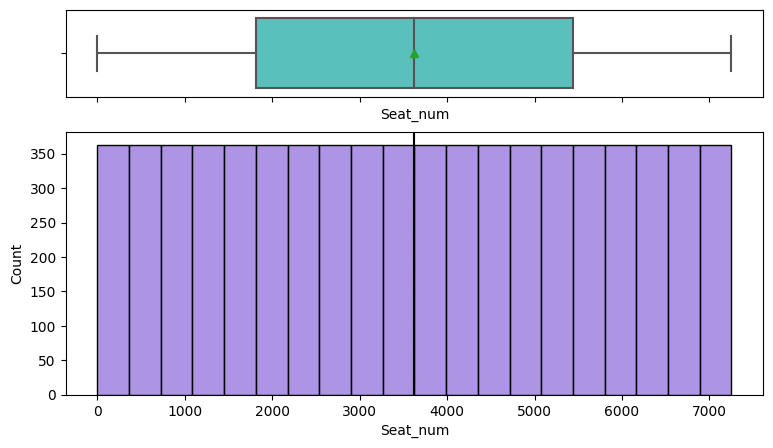

In [47]:
#Visualizing the Seat_num
histogram_boxplot(data =car4U_df, feature = 'Seat_num')

No outlier is seen in this visualization. The mean and the median are also close showing no skewness

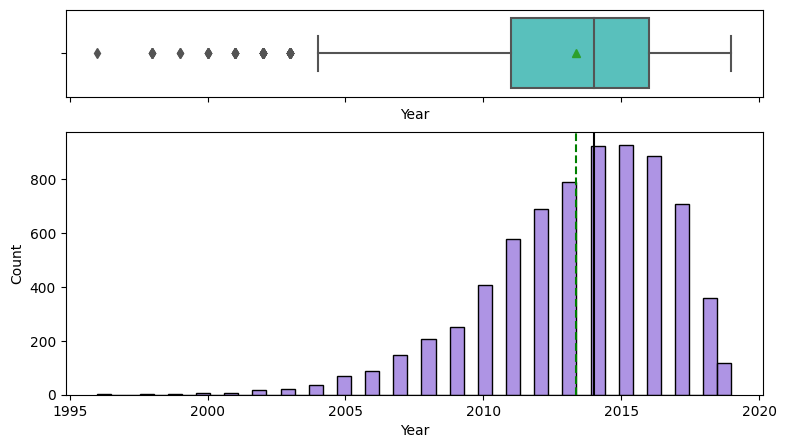

In [48]:
#Visualizing the Year
histogram_boxplot(data =car4U_df, feature = 'Year')

The plots showed that it is skewed to the left. We also have lots of outliers. The mean and median seems not to be close to each other.

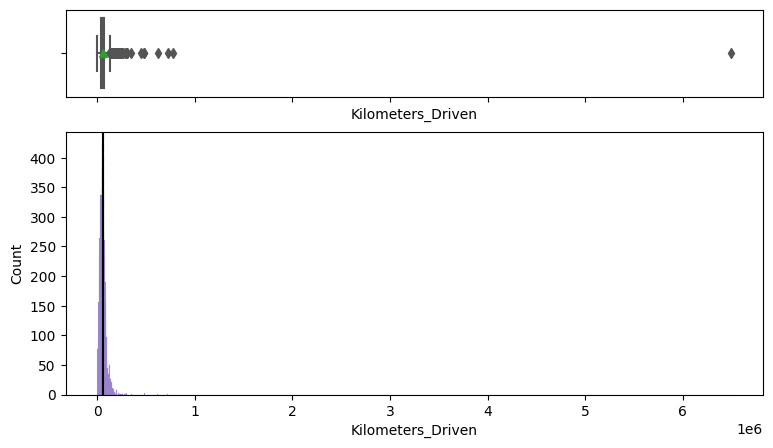

In [49]:
#Visualizing the Kilometers_Driven
histogram_boxplot(data =car4U_df, feature = 'Kilometers_Driven')

- Outlier was observed here.The mean is slightly higher than the median.
- This showed a slight right-skewness in the distribution of the "Kilometers_Driven

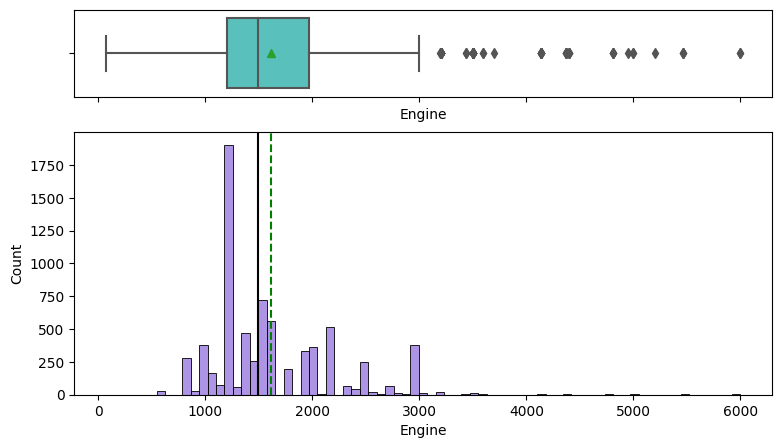

In [50]:
#Visualizing the Engine
histogram_boxplot(data =car4U_df, feature = 'Engine')

Outliers occured between the number of 3000 to 6000. The distribution is also skewed to the right

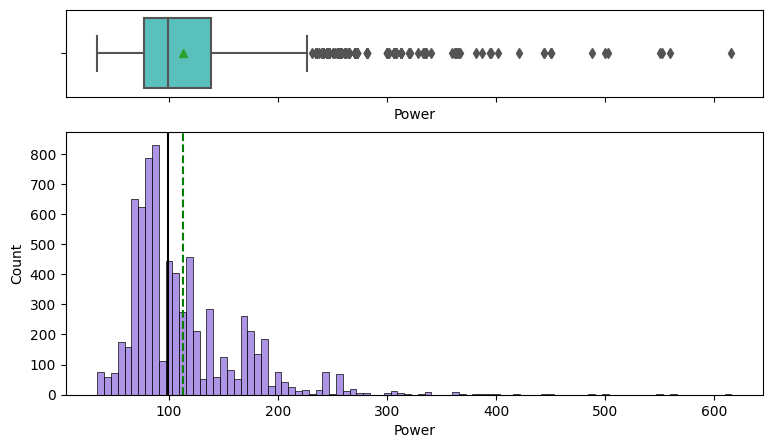

In [51]:
#Visualizing the Power
histogram_boxplot(data =car4U_df, feature = 'Power')

Lots of Outliers was observed. The distribution is also skewed to the right

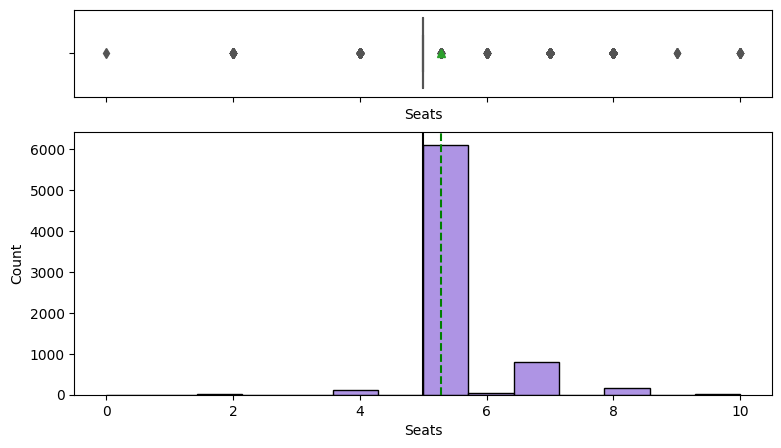

In [52]:
#Visualizing the Seats
histogram_boxplot(data = car4U_df, feature = 'Seats')

The box plot shwoed lots of outliers in both the right and left distributions. There is slight skewness when it comes to the distribution

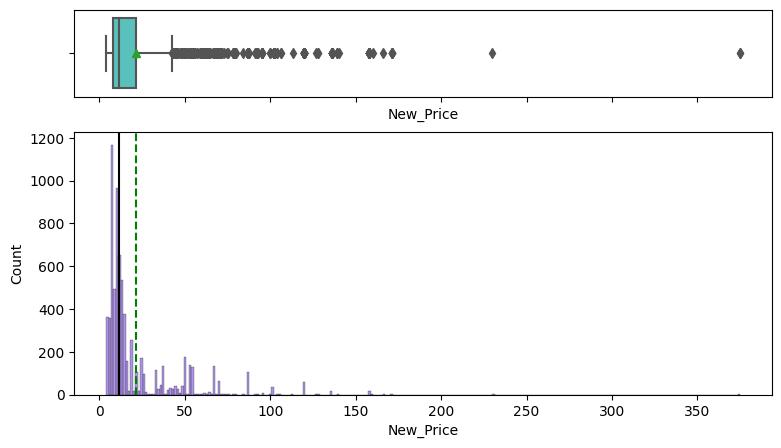

In [53]:
#Visualizing the New_Price
histogram_boxplot(data = car4U_df, feature = 'New_Price')

The plots showed outliers. The distribution is also not normally distributed as it is left skewed.

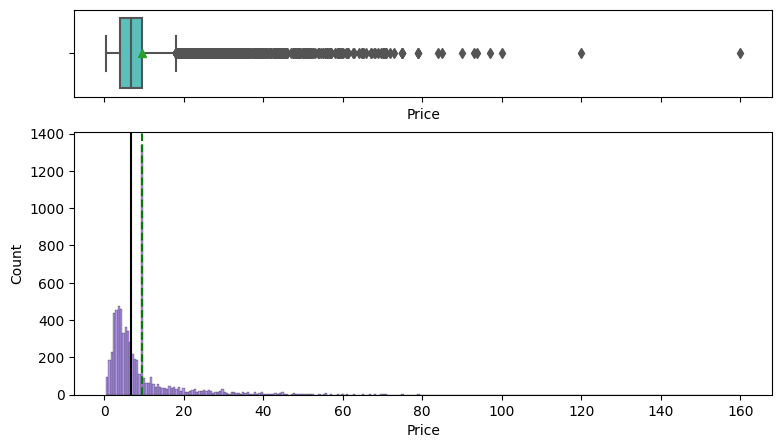

In [54]:
#Visualizing the Price
histogram_boxplot(data = car4U_df, feature = 'Price')

This is skewed to the left and there is prsence of outliers in the dataset

#### Univariate Data Visualization on Categorical Variables

In [55]:
# function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

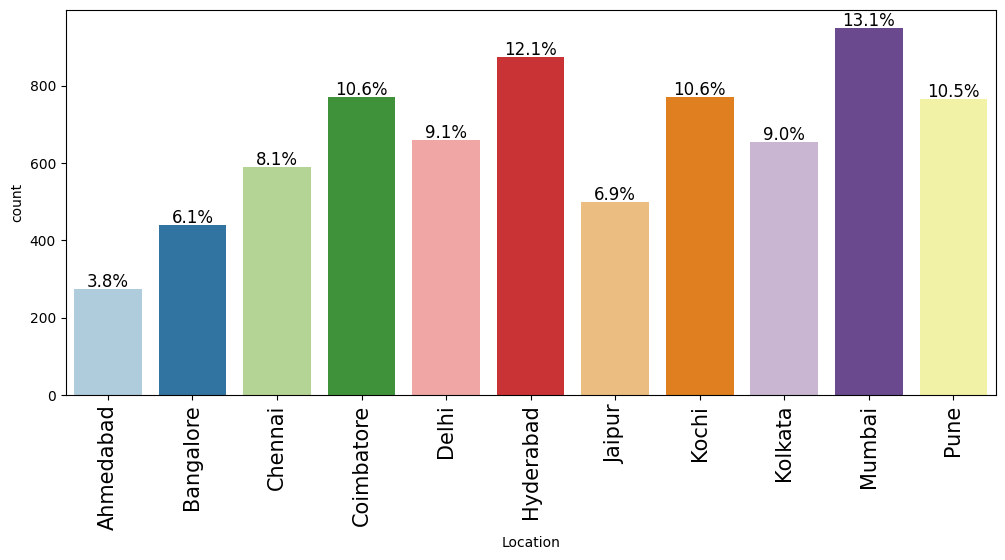

In [56]:
#Visualizing the Loocation of the used cars
labeled_barplot(data = car4U_df, feature = 'Location', perc = True)

In [ ]:
We have more used cars available and also sold in Mumbai and Hyderabad with percenatges of 13.1% and 12.15 respectively.Coimatore and Kochi accounts for 10.6% of the sales and availability of used cars in India. The city of Ahmedabad recorded the lowest used car availability and sales with a percentatge of 3.8%

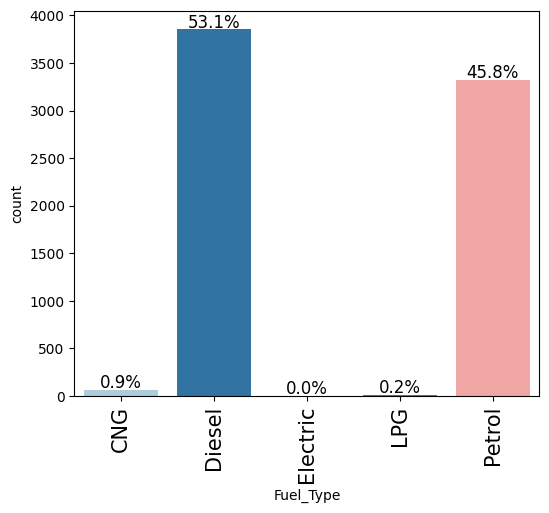

In [57]:
#Visiualizing the Fuel types used by the used cars
labeled_barplot(data = car4U_df, feature = 'Fuel_Type', perc = True)

Cars with Diesel as their fuel type are more in numbers as they contributed 53.1% of the car types been sold. This is followed by Petrol Cars that accounts for 45.8% of the total used cars been sold in India. CNG and LPG are not popular among the used cars sold as they accounted for 0.9% and 0.2% respectively. Currently there is no electric cars among the used cars that are been sold.

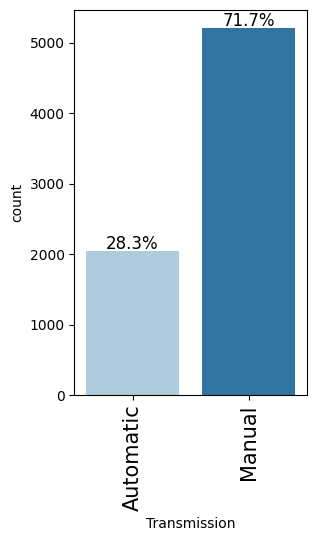

In [58]:
#Visiualizing the Transmission types of the used cars
labeled_barplot(data = car4U_df, feature = 'Transmission', perc = True)

71.7% of the cars are manual type of cars while the Automatic cars are 28.3%

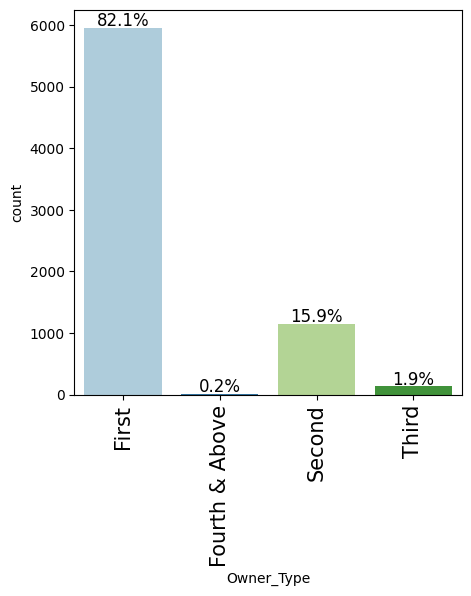

In [59]:
#Visiualizing the Owner types of the used cars
labeled_barplot(data = car4U_df, feature = 'Owner_Type', perc = True)

First Ownership types account for 82.1% ehich distantly followed by Second owner type at 15.9%. The third accounts for 1.9% while Fourth and above accounts for 0.2% which is very insignificant

#### Bivariate Data Visualization

In [60]:
# Create function for scatterplot visualize numerical variables
def customer_plot(x,y, title,data =car4U_df):
    plt.figure(figsize = (6,4))
    sns.scatterplot(x = x, y = y, data = car4U_df)
    plt.title(title)
    plt.show()

#### Seat_num Vs Price

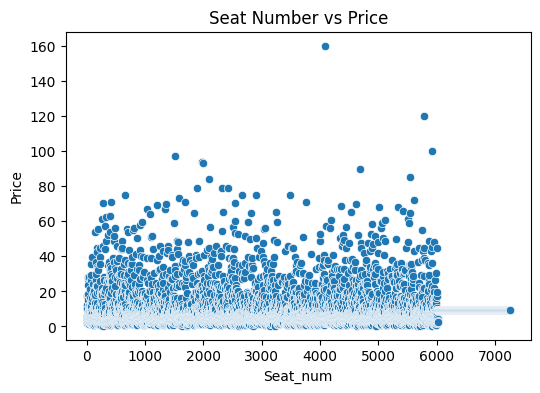

In [61]:
customer_plot(x = 'Seat_num', y = 'Price',
             title = 'Seat Number vs Price')

This showed that the seat number does not contribute to the prices of the used cars. The relationship between them are not well defined and is hard to relate it to the sales of the used cars in India.

#### Year Vs Price

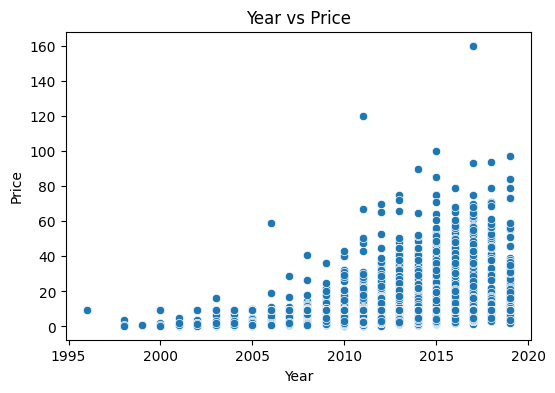

In [62]:
customer_plot(x = 'Year', y = 'Price',
             title = 'Year vs Price')

This showed little relationship between Year and Prcices of the used cars. It implies that the Year of the manufacturing  contributes very little to the price. The contribution is insignificant.

#### Kilometers_Driven vs Price

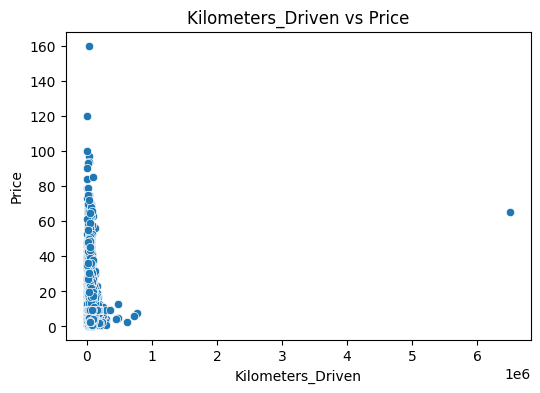

In [63]:
customer_plot(x = 'Kilometers_Driven', y = 'Price',
             title = 'Kilometers_Driven vs Price')

Kilometr Driven showed a weak relationship. It contributes as a determinant for the price but that contribution is weak or insignifiant

#### Engine Vs Price

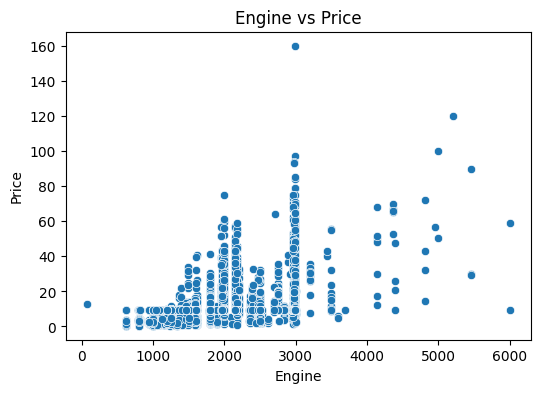

In [64]:
customer_plot(x = 'Engine', y = 'Price',
             title = 'Engine vs Price')

The Engine has a good relationship with the Price. This implies that the Engine is among the determinants of the prices of the used cars been sold in India

#### Power Vs Price

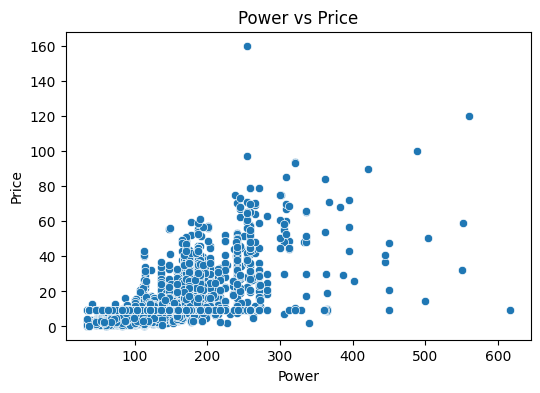

In [65]:
customer_plot(x = 'Power', y = 'Price',
             title = 'Power vs Price')

The power of the used cars has a good relationship with the Price. This implies that the power is a strong determinant of the prices of the used cars been sold in India

#### Seats vs Price

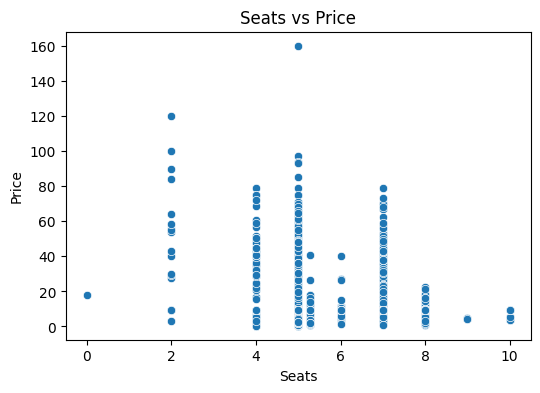

In [66]:
customer_plot(x = 'Seats', y = 'Price',
             title = 'Seats vs Price')

The price is also influenced by the number of the seats of the cars. 

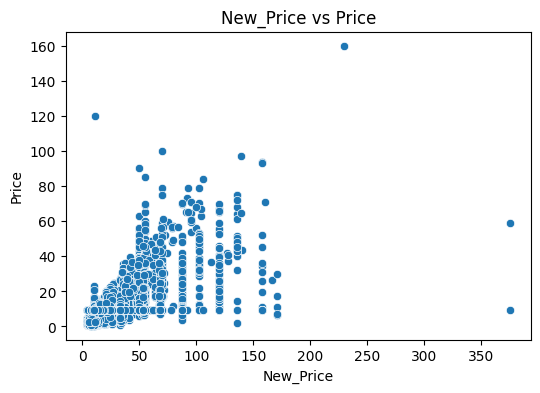

In [67]:
customer_plot(x = 'New_Price', y = 'Price',
             title = 'New_Price vs Price')

There is a strong relationship between price of new (New_Price) and the price of the used cars(Price). This implies that price of new cars are among the strong determinants of the price of the used cars.

#### Coreleation of the numerical variables

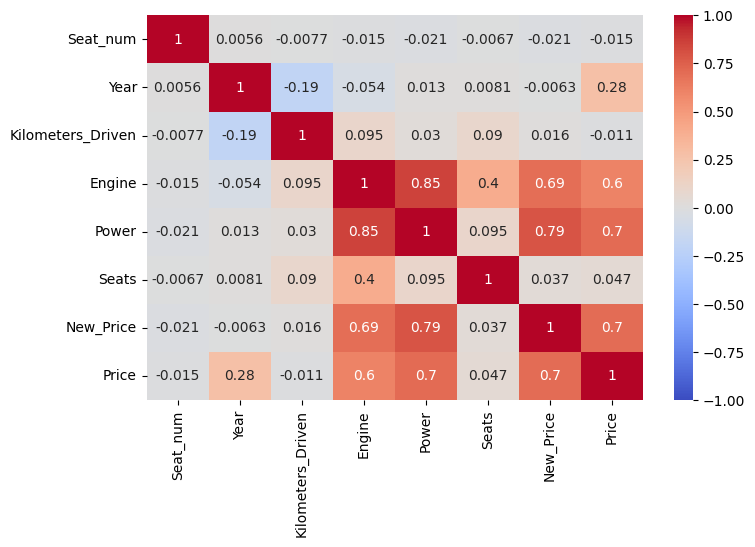

In [68]:
num_data = car4U_df.select_dtypes(include = 'number')

# calculate correlation
mat_cor = num_data.corr()
plt.figure(figsize = (8,5))
sns.heatmap(mat_cor, annot=True, vmin=-1, vmax=1, cmap='coolwarm');

- Just like the scatter plot showed up there, The Engine, Power and New_Price all have a good correlation with Price.
- There is also multicolinearity issues between Engine , Power and New_Price

#### Outlier Detection and Handling

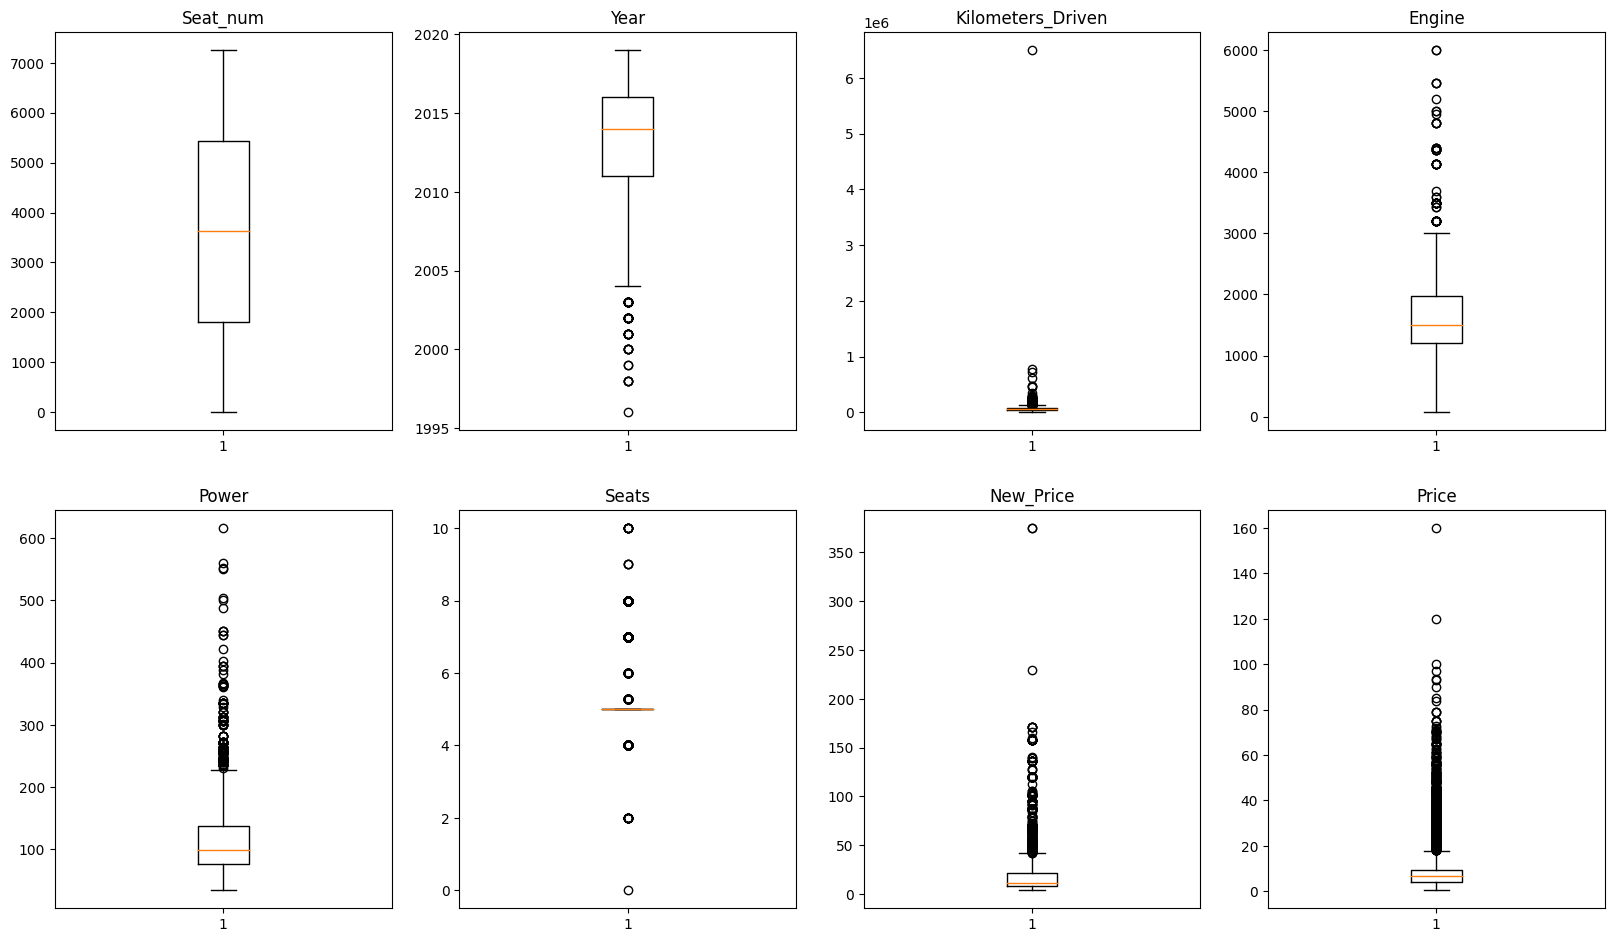

In [69]:
#Using boxplot for the detection
plt.figure(figsize = (20,30))

for i, variable in enumerate(num_data):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(car4U_df[variable])
    plt.title(variable)
    

For, Kilometer_Driven, Engine,Power, New_Price and Price, the outliers are found at the upper whisker while of that of Year appeared at the lower whisker of the data. The seats recorded outlier in both up and lower ends of the whisker. We will go ahead and treat the outliers with the exception of the target variable which is the Price.

#### Treating the Outliers

In [70]:
#Drop the traget variable Price
num_data.drop('Price', axis = 1, inplace = True)

In [71]:
# sanity check on numericData
num_data.columns

Index(['Seat_num', 'Year', 'Kilometers_Driven', 'Engine', 'Power', 'Seats',
       'New_Price'],
      dtype='object')

In [72]:
#create a function to treate outliers
def treat_outliers(car4U_df, col):
    '''
    treat outliers found in variables
    col: str, name of the numerical variable
    videoGame_data: dataframe
    '''
    Q1 = car4U_df[col].quantile(0.25) # 25th quantile
    Q3 = car4U_df[col].quantile(0.75) # upper quantile
    IQR = Q3 - Q1
    lower_whisker = Q1 - (1.5 * IQR)
    upper_whisker = Q3 + (1.5 * IQR)
    car4U_df[col] = np.clip(car4U_df[col], lower_whisker, upper_whisker)
    return car4U_df

# define a function to treat all the variables

def treat_outliers_all(ar4U_df,col_list):
    for c in col_list:
        ar4U_df = treat_outliers(car4U_df,c)
    return car4U_df

In [73]:
car4U_df = treat_outliers_all(car4U_df,num_data)

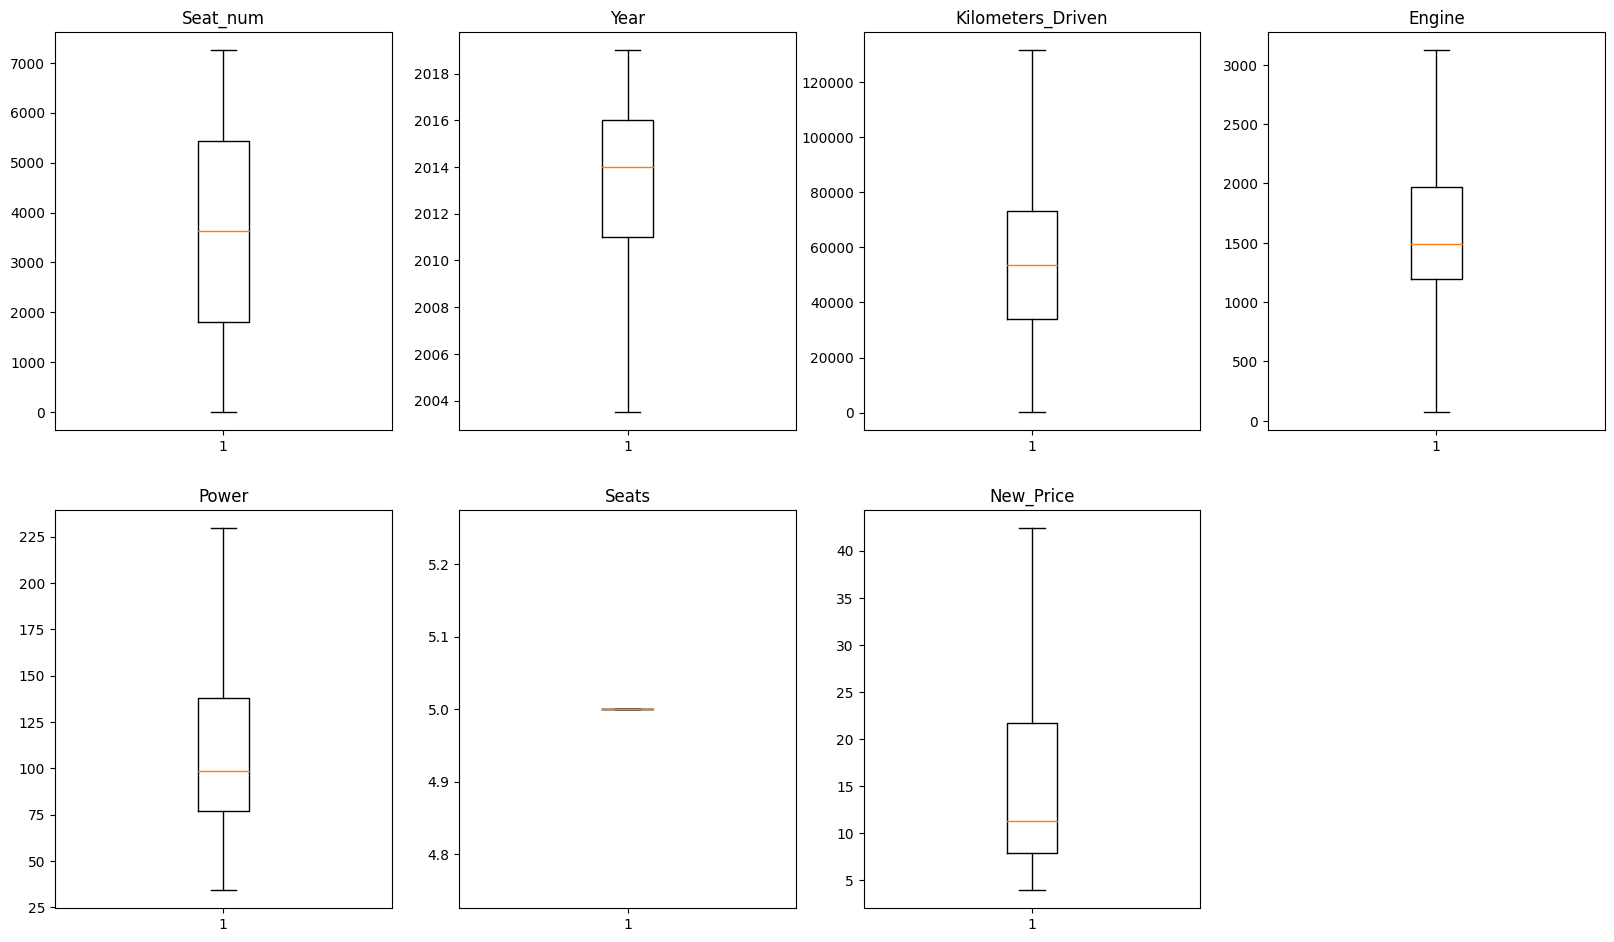

In [74]:
#sanity checks on the treated outliers using boxplot
plt.figure(figsize = (20,30))

for i, variable in enumerate(num_data):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(car4U_df[variable], whis = 1.5)
    plt.title(variable)
plt.show()

The outliers have been cleaned out or treated.I need to transform the log of the target which is the Price. This will help to make the right skewed or skewed variable to to be normal

#### Transgformation of the target using log transformation

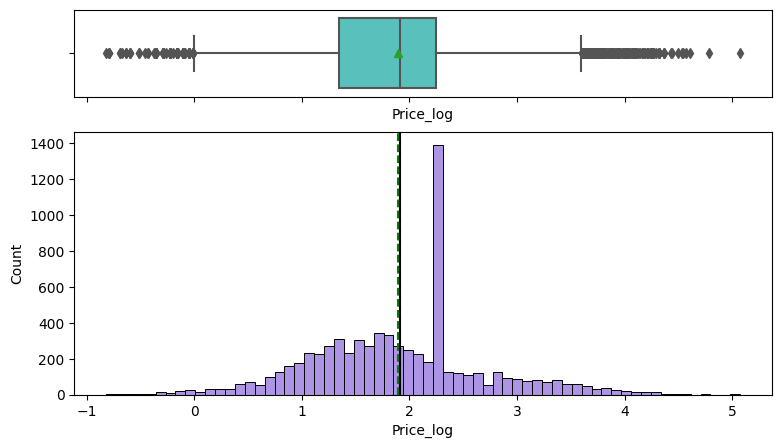

In [75]:
car4U_df['Price_log'] = np.log(car4U_df['Price'])
histogram_boxplot(data = car4U_df, feature = 'Price_log')

The Price which is the target has been transformed. The target is approximately normal now.With this I have satisfied the assumption or requirement for linearity and normality.Our model needs to satisfy the assumptions of linerity and normality. The Price_log will now become my new target. 

#### Build the Model

In [76]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression

In [96]:
#feature selection

x = car4U_df.drop('Price_log', axis=1)
y = car4U_df['Price_log'] + 1e-10

In [97]:
#Since Machine learning does not handle missing values, I will carry sanity check on the features selected

x.isna().sum()

Seat_num             0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
dtype: int64

However we still have some faetures in text in our X. This will lead us to applying OneHotEncoding. This is because machine learning cannot handle raw text

#### OneHote encoding

In [98]:
# convert all categorical features to numerical data (OneHotEncoding)
x = pd.get_dummies(x, drop_first = True)

In [99]:
# observe the x
x.head()

,Seat_num,Year,Kilometers_Driven,Engine,Power,Seats,New_Price,Price,Name_Audi A3 35 TDI Attraction,Name_Audi A3 35 TDI Premium,...,Mileage_9.0 kmpl,Mileage_9.1 kmpl,Mileage_9.3 kmpl,Mileage_9.43 kmpl,Mileage_9.5 kmpl,Mileage_9.52 kmpl,Mileage_9.7 kmpl,Mileage_9.74 kmpl,Mileage_9.8 kmpl,Mileage_9.9 kmpl
0,0,2010.0,72000,998.0,58.16,5.0,5.510,1.75,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2015.0,41000,1582.0,126.20,5.0,16.060,12.50,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2011.0,46000,1199.0,88.70,5.0,8.610,4.50,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,2012.0,87000,1248.0,88.76,5.0,11.270,6.00,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,2013.0,40670,1968.0,140.80,5.0,42.405,17.74,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Split the Dataset

In [100]:
from sklearn.model_selection import train_test_split

# Split the dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Split the training set into train and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=0)


In [101]:
x_train.shape

(4641, 2515)

In [102]:
x_test.shape

(1451, 2515)

In [103]:
x_val.shape

(1161, 2515)

#### Scale the model

In [104]:
# Normalize the data. Please note that only the fit_transformation is called only on the training.
scaler = StandardScaler()
x_train_sd = scaler.fit_transform(x_train)

# for validation we don't need to recalculate the mean. We will use the one calculated mean from training
x_val_sd = scaler.transform(x_val) 
x_test_sd = scaler.transform(x_test)

####  Build and Train a Model using Linear regression

In [105]:
lin_reg = LinearRegression()

# build the model
lin_reg.fit(x_train_sd, y_train)


LinearRegression()

#### Check the performance of the trained Model

In [106]:
# import the performance measuring libries
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [107]:
# Create a function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# create function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# cretae a function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predict using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  #  to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred) # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            'MAPE': mape,
        },
        index=[0],
    )

    return df_perf


##### Interprets Model performance

In [108]:
#performance measurement of the trained model
lin_reg_train = model_performance_regression(lin_reg, x_train_sd, y_train)
lin_reg_train

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.248301,0.182893,0.907775,0.798625,4.574454e+08


The R-square is 90.7% while Adjusted R-square is 79.8% percent which is a good result.Approximately 90.7% variation in Price variables was explained by all the individual features in the data.

In [111]:
#performance measurement of the trained model
lin_reg_val = model_performance_regression(lin_reg, x_val_sd, y_val)
lin_reg_val

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,2.489874e+13,4.935972e+12,-9.789823e+26,8.380955e+26,2.253591e+14


The performance did not generalized well on validation. it showed massive overfitting. I have to try and regression model

#### Build and Train a Model using Ridge  regression

In [112]:
#import thr Ridge libry
from sklearn.linear_model import Ridge

In [114]:
# initiate the model
ridge = Ridge(random_state=0)
ridge.fit(x_train_sd, y_train)

Ridge(random_state=0)

In [115]:
#check the performance of the ridge regression
ridge_train = model_performance_regression(ridge, x_train_sd,y_train)
ridge_train


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.179326,0.112679,0.951897,0.894965,4.202069e+08


In [116]:
# check performance of the validation
ridge_val = model_performance_regression(ridge, x_val_sd,y_val)
ridge_val

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.319052,0.213125,0.839253,1.137614,1.659583e+09


The Lasso regression model seems to perform better. The R-squared showed a generalization, However, the adjusted R-squared showed overfitting of the model.

#### Build and Train a Model using Random Forest

In [118]:
# import Random forest and Gradient Boosting Libries
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

In [119]:
 #train the randormforest model
rf = RandomForestRegressor(random_state = 0)
rf.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

In [120]:
# Carry out performance checks on the training data
rf_train = model_performance_regression(rf,x_train, y_train)
rf_train 

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.003529,0.000359,0.999981,0.999959,915039.744691


In [121]:
# Carry out performance checks on the validation data
rf_val = model_performance_regression(rf,x_val, y_val)
rf_val

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.002157,0.000656,0.999993,1.000006,907497.968314


The Model seems to perform better as the performance on the validation data for R-squared and Adjusted R-squared performed better than that of the training data.

#### Build and Train a Model using GradientBoosting

In [122]:
 #train the model
gb = GradientBoostingRegressor(random_state = 0)
gb.fit(x_train, y_train)

GradientBoostingRegressor(random_state=0)

In [123]:
# Carry out performance checks on the train data
gb_train = model_performance_regression(gb,x_train, y_train)
gb_train 

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.006723,0.004417,0.999932,0.999852,2.843926e+06


In [124]:
# Carry out performance checks on val
gb_val = model_performance_regression(gb,x_val, y_val)
gb_val 

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.007015,0.004463,0.999922,1.000067,2.273671e+06


- The performance was also good are I observed good generalization of the model.
- However, I will go with the Random forest model as the performance of R-squared on validation was better than that of training when compared with other regressor models that I built.

I will now check the performance on the test for the random forest model

In [125]:
# Carry out performance checks on the test data
rf_test = model_performance_regression(rf,x_test, y_test)
rf_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.002081,0.000655,0.999993,1.000009,943990.651765


The performance was also better on the test data for Random Forest Model.

#### To predict the prices of used cars

In [126]:
# Make predictions on the test data
y_pred = rf.predict(x_test)

In [127]:
# Compare the predicted values (y_pred) with the actual values (y_test)
prediction_comparison = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})

# Generate insights and recommendations
mean_absolute_error = abs(y_test - y_pred).mean()  # Calculate mean absolute error
recommendations = "Based on the predictions, it is observed that the model has an average absolute error of {:.2f} units.".format(mean_absolute_error)

# Print the comparison of actual and predicted values
print(prediction_comparison)

# Print insights and recommendations
print(recommendations)

      Actual Price  Predicted Price
4178      1.931521         1.931594
528       1.749200         1.750294
7235      2.249128         2.249128
4658     -0.051293        -0.059816
4281      1.098612         1.098612
...            ...              ...
3039      2.862201         2.862229
2207      1.504077         1.504077
4875      1.011601         1.011416
4925      3.555348         3.555348
4786      1.163151         1.163182

[1451 rows x 2 columns]
Based on the predictions, it is observed that the model has an average absolute error of 0.00 units.


The outcome implies that the Random Forest model is a trustworthy method for forecasting used automobile prices. It offers precise forecasts that closely match the real prices, which can be helpful for developing pricing insights and making wise business decisions about the sale of used cars.
For example, for used car with serial number 4178, The actual price is 1.931521  and the model's predicted price is 1.931594.

### Reccomendations and Takewaways for the business

- The Engine, Power and New_Price all are all good determinat of the price of used cars.
- The business of selling used cars are best situated in places like Mumbai, Hyderabad, Coimatore and Kochi
- To succeed in the business, the businees should concentrate of Diesel and Petrol type of cars for now and avoid should do well and avoid electric cars.
- More attention should be given to Manual transmission cars as customers seems to buy more manual transmission cars than automatic.
- More attantion should also be given to ownership with First hand values than others as this group contributes over 82% of the sales.

